# Types of Charts


Dimensions represent variables that can’t be included in mathematical calculations (categorical data), while measures are variables that can be included in mathematical calculations (continuous data).

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing the latest ords_prods_merge pickle
path = "/Users/satoruteshima/Documents/CareerFoundry/Data Immersion 4/08-2023 Instacart Basket Analysis"

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join( path, '02 Data', '02 Prepared Data', 'orders_products_all_merged.pkl'))

plot.bar(). tells Python to find the bar() function within the plot module, and it’s what actually creates your bar chart. 

<Axes: >

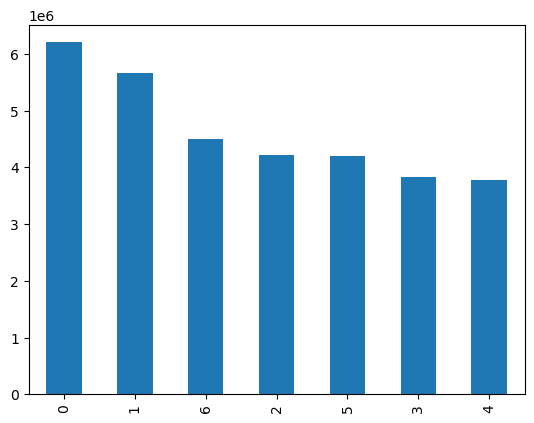

In [12]:
#create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In this bar chart, you can see that the observations are ordered from largest to smallest. This is great as it allows you to quickly determine the largest and smallest categories; however, if you did want to change this, you could do so by way of an additional function—sort_index():

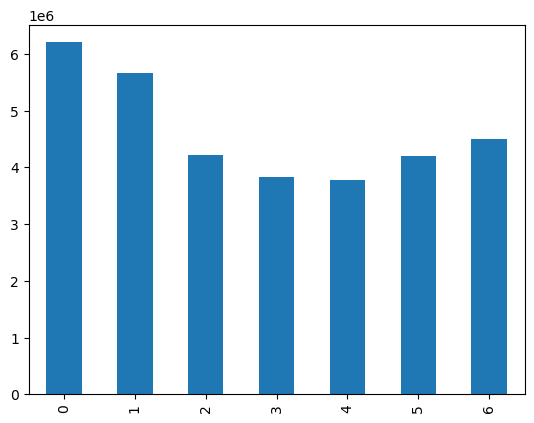

In [13]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

This same trick can actually be used when printing frequencies, as well:

In [17]:
#printing frequencies with sort_index()
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

In [19]:
#printing frequencies without sort_index()
ords_prods_merge['orders_day_of_week'].value_counts()


0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

To make your bars more distinct, you can also change their color. Doing so is as easy as adding a color argument in your plot.bar() function and listing the colors you want in order:

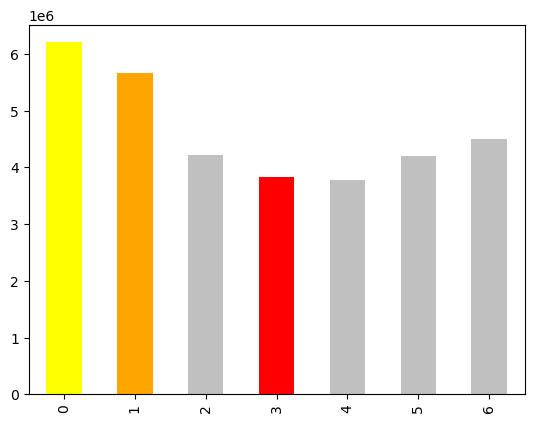

In [25]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color= ['yellow', 'orange','silver', 'red', 'silver', 'silver', 'silver'])

# Exporting Charts


The code you used above generated a preview for your visualization but didn’t actually save it in Jupyter’s memory. You’ll need to update your command.

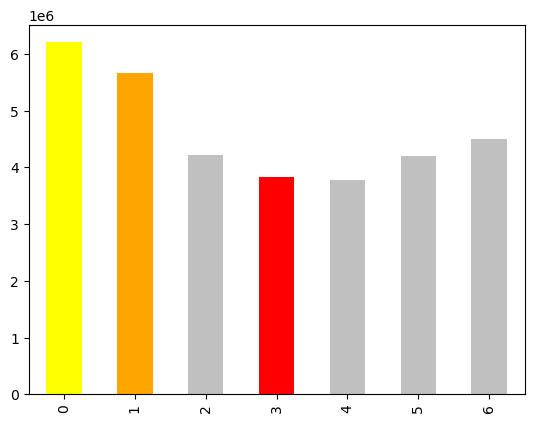

In [26]:
#assigning 'bar' to the barchart above. 
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color= ['yellow', 'orange','silver', 'red', 'silver', 'silver', 'silver'])

by calling bar.figure you can access it anytime.

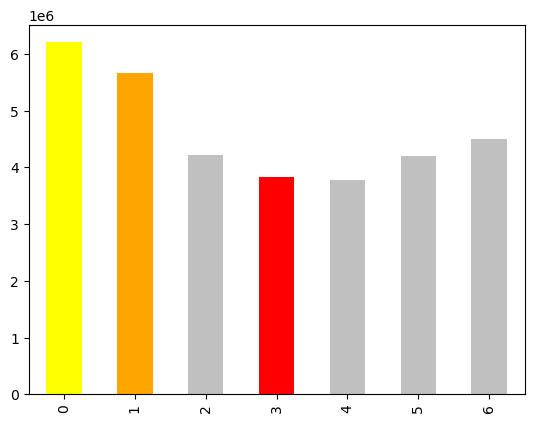

In [27]:
#calling the bar created above
bar.figure

Use figure.savefig() function to export the visualization outside of jupyter notebook.

In [29]:
#exporting the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots


RECAP: 
histograms are used to show the density of a continuous variable—the distribution of observations per their occurrence in a data set.

Bar charts are good for categorical data and histograms are more appropriate for continuous data.

In [1]:
#create histograms
ords_prods_merge['prices'].plot.hist(bins = 25)

NameError: name 'ords_prods_merge' is not defined

Something is wrong! let's check the descriptive statistics of 'prices' column

In [31]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

something is odd with the max value. Let's further explore what's up.

In [32]:
ords_prods_merge['prices'].max()

99999.0

In [33]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [34]:
ords_prods_merge['prices'].median()

7.4

## Scatterplot

Another way to explore your data is to create a scatterplot.

When conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers

<Axes: xlabel='prices', ylabel='prices'>

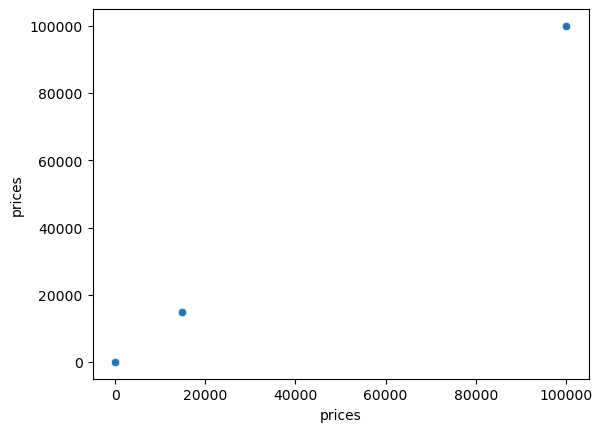

In [35]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

here are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let's investigate! Are there any products more expensive than 100 dollars? 

In [41]:
ords_prods_merge.loc[ords_prods_merge['prices'] == nan]

NameError: name 'nan' is not defined

From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100)

 $1490000, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99999.00 you identified previously. As such, you can assume that it’s the $1490000 and $9999900 values that are skewing your charts.
 
#### For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:

In [37]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [46]:
#locate null value
outlier_prices = ords_prods_merge.loc[ords_prods_merge['prices'].isna()]
print(outlier_prices['product_id'].count())

5127


same number of rows as before!

In [47]:
#check the max value of 'prices'
ords_prods_merge['prices'].max()

25.0

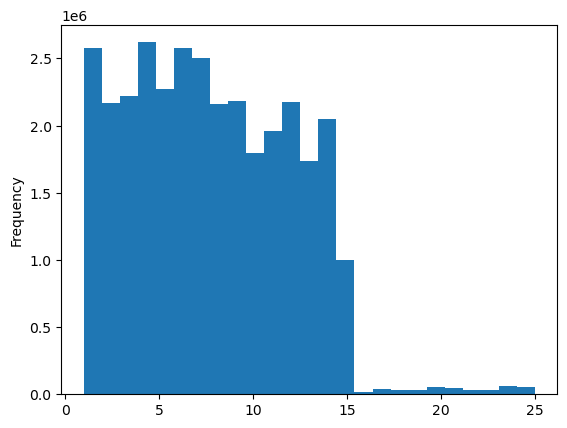

In [53]:
#create histogram again 
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

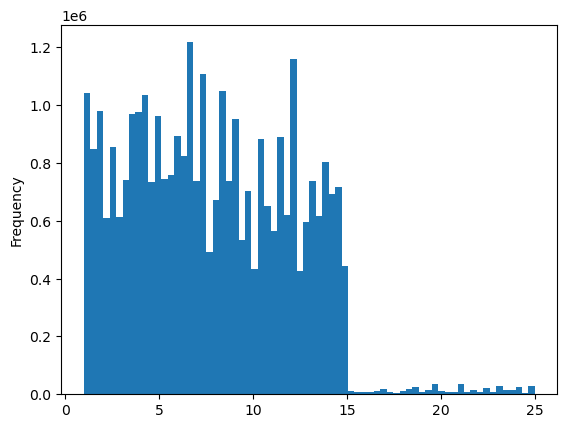

In [49]:
#create a more thinner histogram
hist_2 = hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [51]:
#exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'histogram2_prices.png'))

In [54]:
hist.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'histogram_prices.png'))

# Creating Line Charts


Line charts are traditionally used to visualize the development of a characteristic over time.

this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). T

In [55]:
#create a subset so that the computer will not crash
df = ords_prods_merge[:2000000]

But does this work? The answer is, well, no. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!

# Sampling Data


In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized. You can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can you be sure it accurately represents the dataframe as a whole.

The first step, then, is to create some random samples. A sample, as you learned back in Achievement 1, is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split.

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. 

In [56]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

The seed is set via the NumPy function random.seed(). We’ve set the seed to 4 for now. Feel free to do so as you follow along to ensure you’re using the same random pattern of numbers as in the examples. Then, in the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

In [57]:
dev

array([False,  True, False, ...,  True,  True,  True])

np.random.rand() function being used as your argument. This function is what will actually create your list of random floating numbers between 0 and 1. The np at the beginning stands for the NumPy library, the random in the middle is a function that creates random numbers, and the rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution. Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur in the distribution.

In [59]:
np.random.rand(10) 

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ])

 len (ords_prods_merge) represents the number of rows. 

So, to recap each piece of the split code, you need to:

- Set the seed for the random number generator.
- Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
- Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
- Store the results of the test in a new list, dev, in the form of boolean values (True and False).

- np.random.seed(4): This line sets the seed for the random number generator in NumPy to 4. Setting a seed allows you to generate the same random numbers each time you run the code. It ensures reproducibility, so if you run the code with the same seed, you'll get the same random numbers.

- np.random.rand(len(ords_prods_merge)): This part generates an array of random numbers between 0 and 1. The length of this array is equal to the number of rows in the ords_prods_merge DataFrame.

- <= 0.7: This part of the code checks if each random number in the array is less than or equal to 0.7. This condition results in a boolean array where each element is True if the corresponding random number is less than or equal to 0.7 and False otherwise.

You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples? This will involve an elegant hack:

big = ords_prods_merge[dev]

small = ords_prods_merge[~dev]

In [60]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [61]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev] 

In [62]:
#check the number of rows
len(ords_prods_merge)

32404859

In [63]:
len(big)

22683761

In [64]:
len(small)

9721098

In [65]:
len(big)+len(small)

32404859

In [70]:
#extract only the columns you need to make the sample size dataframe
df_2 = small[['orders_day_of_week', 'prices']]

In [ ]:
#Create a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [73]:
line.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'line_prices_orderday.png'))

In [77]:
small.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,busiest_days,most_orders,max_order,loyalty_flag,max_price,spending_flag,order_frequency_flag,avg_price,purchase_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Regular busy,Most orders,32,Regular customer,20.0,Low spender,Frequent customer,6.935811,8.0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Busiest day,Average orders,5,New customer,18.5,Low spender,Frequent customer,7.930208,8.0
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Least busy,Most orders,3,New customer,14.0,Low spender,Frequent customer,4.972414,9.0
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,both,Regular busy,Most orders,9,New customer,10.3,Low spender,Regular customer,5.957576,20.0
10,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,1,5,11,...,both,Regular busy,Most orders,10,New customer,13.8,Low spender,Regular customer,5.813636,20.0


In [4]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev] 

In [6]:
df_2 = small[['order_hour_of_day', 'prices']]

In [115]:
df_4 = small [['order_hour_of_day', 'loyalty_flag']]

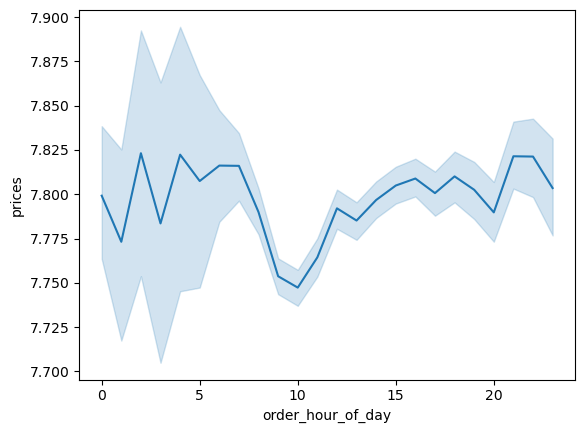

In [7]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [8]:
line.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'line_prices_orderhour.png'))

In [9]:
ords_prods_merge['prices'].max()

25.0

In [10]:
ords_prods_merge['prices'].min()

1.0

In [11]:
ords_prods_merge['prices'].mean()

7.790672403768025

In [14]:
prices_agg = ords_prods_merge.agg({
    'prices': ['min', 'mean', 'max']
})

prices_agg

,prices
min,1.000000
mean,7.790672
max,25.000000


<Axes: >

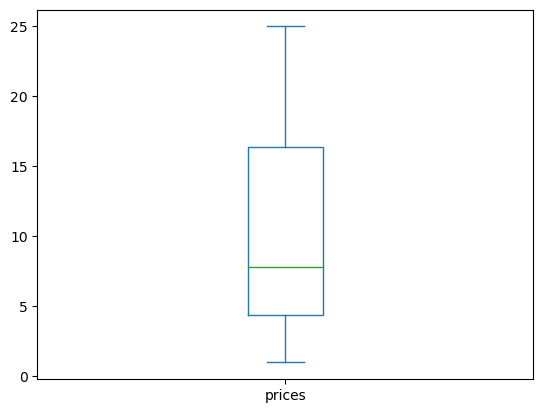

In [19]:
prices_agg.plot.box()

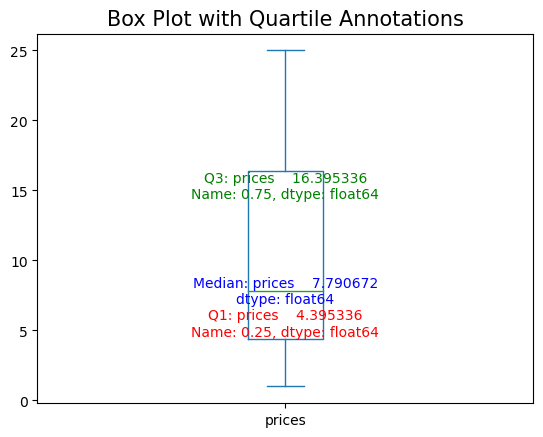

In [20]:
# Create the box plot
ax = prices_agg.plot.box()

# Calculate quartiles (Q1, median, Q3)
q1 = prices_agg.quantile(0.25)
median = prices_agg.median()
q3 = prices_agg.quantile(0.75)

# Annotate the plot with quartile values
ax.text(1, q1, f'Q1: {q1}', ha='center', va='bottom', fontsize=10, color='red')
ax.text(1, median, f'Median: {median}', ha='center', va='center', fontsize=10, color='blue')
ax.text(1, q3, f'Q3: {q3}', ha='center', va='top', fontsize=10, color='green')

# Set a title for the plot
plt.title("Box Plot with Quartile Annotations", fontsize=15)

# Display the plot
plt.show()


In [23]:
ax.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'price_box_plot.png'))

In [25]:
df3 = small[['department', 'user_id']]

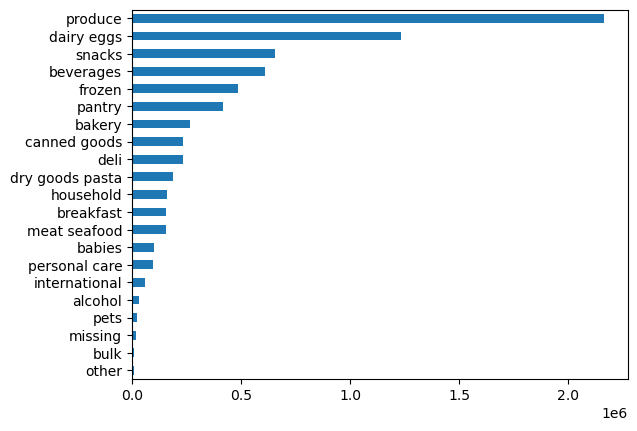

In [42]:
value_counts_sorted = df3['department'].value_counts().sort_values(ascending=True)

# Create a horizontal bar plot
popularorders = value_counts_sorted.plot(kind='barh')

In [37]:
df3_sorted = df3.sort_values(by='other', ascending=True)
df3_sorted['department'].value_counts().plot.barh()

KeyError: 'other'

In [44]:
popularorders.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'popular_department_bar.png'))

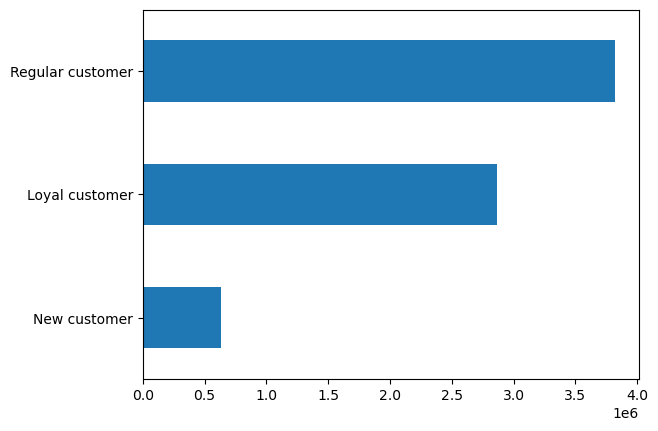

In [67]:
loyalty_dist_bar = small['loyalty_flag'].value_counts().sort_values(ascending=True).plot.barh()


In [49]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    12744558
Loyal customer       9555491
New customer         2114828
Name: loyalty_flag, dtype: int64

In [52]:
part = np.array([12744558, 9555491, 2114828])  # Replace with your part values
whole = 24414877  # Replace with the common whole value

In [56]:
percentage = (part / whole) * 100
print(percentage)
rounded_percentage = np.round(percentage, 0)  # Rounds to 2 decimal places
print(rounded_percentage)

[52.19996808 39.13798542  8.66204651]
[52. 39.  9.]


In [ ]:
ax.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'price_box_plot.png'))

In [66]:
loyalty_dist_bar.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'loyalty_dist_bar.png'))

AttributeError: 'Axes' object has no attribute 'savefig'

In [102]:
loyal_color = ['lightblue', 'blue', 'purple', 'teal', 'red', 'orange']

Text(0, 0.5, 'Frequent Users')

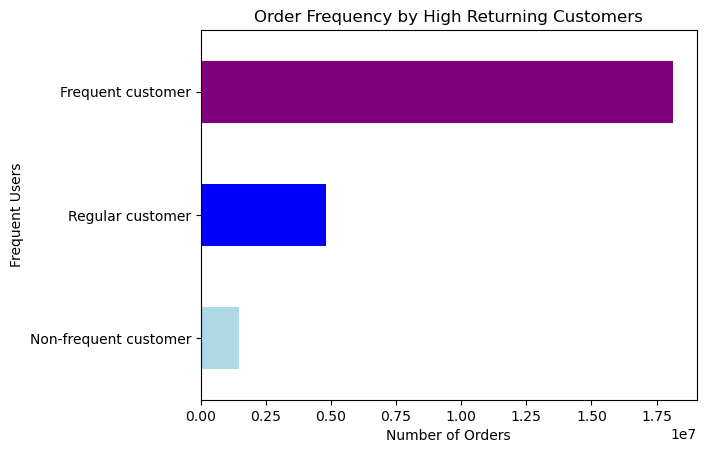

In [101]:
order_fre_return_bar = ords_prods_merge['order_frequency_flag'].value_counts().sort_values(ascending=True).plot.barh(color = ['lightblue','blue', 'purple', 'teal', 'red','orange'])
plt.title('Order Frequency by High Returning Customers')
plt.xlabel("Number of Orders")
plt.ylabel("Frequent Users")

In [85]:
order_fre_return_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'frequent_return.png'))

In [117]:
order_frequency = pd.crosstab(ords_prods_merge['orders_day_of_week'],ords_prods_merge['loyalty_flag'], dropna = False)

In [118]:
order_frequency

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1625294,433126,2543803
1,1710537,360042,2203562
2,1262111,274017,1638246
3,1181488,246012,1479174
4,1205747,237414,1446664
5,1353074,261015,1603108
6,1217240,303202,1830001


Text(0, 0.5, 'Loyal Group')

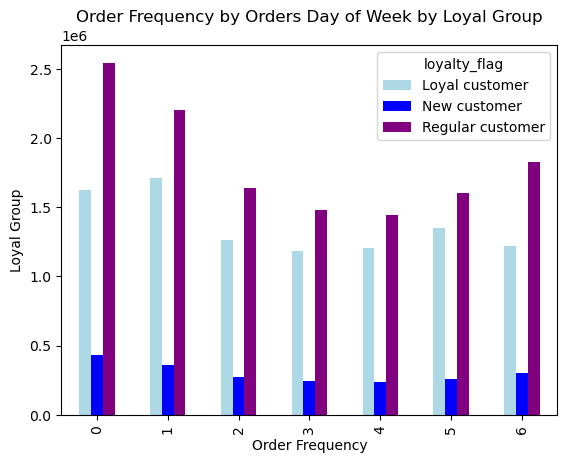

In [125]:
loyalty_frequency_bar = order_frequency.plot.bar(color = loyal_color)
plt.title('Order Frequency by Orders Day of Week by Loyal Group')
plt.xlabel("Order Frequency")
plt.ylabel("Loyal Group")


In [126]:
order_hour_frequency = pd.crosstab(small['order_hour_of_day'],small['loyalty_flag'], dropna = False)

Text(0, 0.5, 'Order Counts')

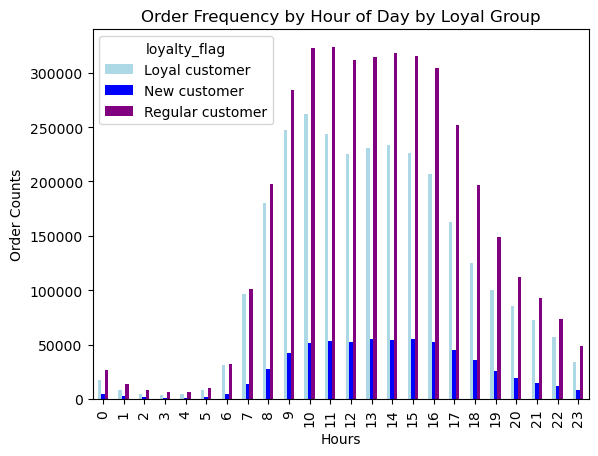

In [133]:
order_hour_of_bar = order_hour_frequency.plot.bar(color=loyal_color)
plt.title('Order Frequency by Hour of Day by Loyal Group')
plt.xlabel("Hours")
plt.ylabel("Order Counts")

In [ ]:
line2 = sns.lineplot(data = df_4, x = 'order_hour_of_day',y = 'loyalty_flag')

In [ ]:
order_frequency = pd.crosstab(ords_prods_merge['orders_day_of_week'],ords_prods_merge['loyalty_flag'], dropna = False)